## Analyze trial-level performance

In [26]:
import xarray as xr
import seaborn as sns

In [3]:
dset = xr.load_dataset('data/steinmetz_2017-11-01_Forssmann.nc')
dset

<xarray.Dataset>
Dimensions:             (trial: 359, time: 250, cell: 1769,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 13, spike_id: 3485977)
Coordinates:
  * trial               (trial) int32 1 2 3 4 5 6 7 ... 354 355 356 357 358 359
  * time                (time) float64 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 1 2 3 4 5 6 ... 1765 1766 1767 1768 1769
  * waveform_component  (waveform_component) int32 1 2 3
  * probe               (probe) int32 1 2 3 4 5 6 7 ... 379 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) object 'DG' 'LGd' 'SUB' ... 'LSr' 'MOs'
  * spike_id            (spike_id) int32 1 2 3 4 ... 3485975 3485976 3485977
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 0 0 50 25 25 100 0 0 ... 0 100 0 0 100 0 0
    contrast_right      (trial) int8 100 50 25 100 100 100 ... 100 25 100 100 25
    gocue               (trial) float64 0.7917 0.7082 0.4178 ... nan nan nan
    stim_onset          (trial) float64 0.5 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 1.0 1.0 -1.0 1.0 1.0 ... nan nan nan nan
    feedback_time       (trial) float64 1.09 1.002 0.5842 0.5695 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 0.0 ... 0....
    waveform_u          (cell, waveform_component, probe) float32 0.008219 .....
    lfp                 (brain_area_lfp, trial, time) float64 -5.845 ... 10.82
    spike_time          (spike_id) float32 1.144 1.147 1.149 ... 0.8945 1.742
    spike_cell          (spike_id) uint32 1 1 1 1 1 ... 1769 1769 1769 1769 1769
    spike_trial         (spike_id) uint32 1 1 1 1 1 1 ... 358 358 359 359 359
Attributes:
    session_date:  2017-11-01
    mouse:         Forssmann
    stim_onset:    0.5
    bin_size:      0.01

### Filter out passive trials

In [12]:
df = (
    dset
    .sel(trial=dset.trial[dset.active_trials == True])
    [[
        'contrast_left',
        'contrast_right',
        'gocue',
        'stim_onset',
        'feedback_type',
        'feedback_time',
        'response_type',
        'response_time',
        'reaction_type',
        'reaction_time',
        'prev_reward'
        ]]
        .to_dataframe()
)
df

,contrast_left,contrast_right,gocue,stim_onset,feedback_type,feedback_time,response_type,response_time,reaction_type,reaction_time,prev_reward
trial,,,,,,,,,,,
1,0,100,0.791688,0.5,1.0,1.090493,-1.0,1.044835,-1.0,310.0,-10.000000
2,0,50,0.708181,0.5,1.0,1.002186,-1.0,0.966316,-1.0,320.0,-4.383565
3,50,25,0.417824,0.5,-1.0,0.584178,-1.0,0.584178,-1.0,350.0,-4.698934
4,25,100,0.427914,0.5,1.0,0.569517,-1.0,0.534072,-1.0,300.0,-2.615788
5,25,100,0.497949,0.5,1.0,1.034758,-1.0,0.997471,-1.0,230.0,-2.335945
...,...,...,...,...,...,...,...,...,...,...,...
245,100,0,0.790191,0.5,-1.0,2.592424,0.0,2.592424,0.0,inf,-2.560319
246,100,0,0.770577,0.5,-1.0,2.574098,0.0,2.574098,0.0,inf,-2.576880
247,100,0,0.540206,0.5,-1.0,2.344198,0.0,2.344198,0.0,inf,-2.531157


## Analyze the data

In [21]:
(df
 [['contrast_left', 'contrast_right']]
 .value_counts(normalize=True)
 .unstack()
 .round(2)
)

contrast_right,0,25,50,100
contrast_left,,,,
0,0.27,0.07,0.05,0.06
25,0.05,0.02,0.05,0.05
50,0.06,0.06,0.02,0.04
100,0.05,0.07,0.05,0.03


## Performance by contrast difference

In [24]:
df['contrast_diff']= df.contrast_right - df.contrast_left

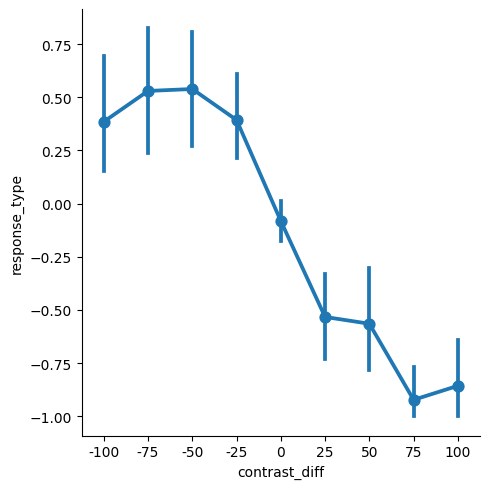

In [30]:
sns.catplot(df, x="contrast_diff", y="response_type", kind='point');